In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMwWp1a5SObWIq3f84aL")
project = rf.workspace("traffic-management-wxhga").project("emergency_dataset")
version = project.version(4)
dataset = version.download("yolov12")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emergency_dataset-4 in yolov12:: 100%|██████████| 9962/9962 [00:01<00:00, 6684.10it/s]


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO("yolo12m.pt")

100%|██████████| 39.0M/39.0M [00:00<00:00, 78.6MB/s]


In [5]:
from ultralytics import YOLO

results = model.train(
    data="/content/emergency_dataset-4/data.yaml",
    imgsz=640,
    epochs=40,
    save_period=1,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    flipud=0.2,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo12m.pt, data=/content/emergency_dataset-4/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 4.84MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 4]        
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 22.8MB/s]


AMP: checks passed ✅


train: Scanning /content/emergency_dataset-4/train/labels... 3486 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3486/3486 [00:02<00:00, 1314.36it/s]


train: New cache created: /content/emergency_dataset-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2984, len(boxes) = 4288. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/emergency_dataset-4/valid/labels... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<00:00, 1042.46it/s]

val: New cache created: /content/emergency_dataset-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 123 weight(decay=0.0), 130 weight(decay=0.0005), 129 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      11.3G      1.467      2.209      1.893         44        640: 100%|██████████| 218/218 [00:46<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.62it/s]


                   all        993       1242      0.212       0.28      0.125      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      12.8G      1.614      2.252      2.001         63        640: 100%|██████████| 218/218 [00:43<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.33it/s]


                   all        993       1242      0.137      0.216     0.0835     0.0372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      12.8G      1.591      2.227       1.98         37        640: 100%|██████████| 218/218 [00:42<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.40it/s]

                   all        993       1242      0.337      0.448      0.293      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      12.8G       1.53      2.099      1.923         53        640: 100%|██████████| 218/218 [00:41<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.29it/s]

                   all        993       1242      0.517      0.484       0.47      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      12.8G      1.471      1.996      1.872         51        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all        993       1242      0.576      0.501      0.488      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      12.8G      1.418       1.89      1.831         42        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.38it/s]

                   all        993       1242      0.546      0.579      0.559      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      12.8G      1.394        1.8      1.797         42        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.49it/s]

                   all        993       1242      0.551      0.611      0.573       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      12.8G      1.362      1.761      1.769         38        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]

                   all        993       1242      0.513      0.676      0.621      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      12.8G      1.341      1.698       1.75         61        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.51it/s]

                   all        993       1242      0.615      0.582      0.623      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      12.8G      1.327      1.664      1.747         40        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]

                   all        993       1242       0.64      0.624      0.641       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      12.8G      1.293      1.606      1.716         54        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]

                   all        993       1242      0.606      0.678      0.629      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      12.8G      1.299      1.576      1.717         40        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.42it/s]

                   all        993       1242      0.597      0.643      0.606       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      12.8G      1.286      1.568      1.706         43        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        993       1242      0.657       0.71      0.683      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      12.8G      1.256      1.526      1.686         55        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all        993       1242      0.686      0.675      0.705      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      12.8G      1.238      1.494      1.674         56        640: 100%|██████████| 218/218 [00:41<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        993       1242      0.677      0.694      0.701      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      12.8G      1.234      1.462      1.669         52        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        993       1242      0.714      0.725       0.74      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      12.8G      1.221      1.441      1.658         52        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        993       1242       0.73      0.758      0.755      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      12.8G      1.219      1.401      1.653         58        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]

                   all        993       1242        0.7      0.719      0.758       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      12.8G      1.206      1.402      1.649         53        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.49it/s]

                   all        993       1242      0.687       0.75      0.738      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      12.8G      1.205      1.372      1.635         44        640: 100%|██████████| 218/218 [00:41<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all        993       1242      0.718       0.76      0.786      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      12.8G      1.175      1.344      1.612         45        640: 100%|██████████| 218/218 [00:41<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]

                   all        993       1242       0.73      0.762      0.813      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      12.8G      1.166       1.33      1.603         47        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.48it/s]

                   all        993       1242       0.72      0.818      0.822      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      12.8G      1.167      1.322      1.609         53        640: 100%|██████████| 218/218 [00:41<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        993       1242      0.755      0.772      0.815      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      12.8G      1.151      1.297      1.589         49        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]

                   all        993       1242      0.753      0.766      0.807       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      12.8G      1.138      1.259      1.582         41        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.51it/s]

                   all        993       1242      0.822      0.746      0.843      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      12.8G      1.141      1.278      1.587         42        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        993       1242       0.81      0.802       0.86      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      12.8G      1.119      1.232      1.566         55        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]

                   all        993       1242      0.818       0.77      0.849      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      12.8G      1.126      1.236       1.57         47        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.42it/s]

                   all        993       1242      0.868      0.774       0.87      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      12.8G      1.124      1.219      1.568         32        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        993       1242      0.819      0.793      0.868      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      12.8G      1.107      1.204      1.555         60        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]

                   all        993       1242      0.809      0.837      0.873      0.609


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      12.8G     0.9054     0.8256      1.532         16        640: 100%|██████████| 218/218 [00:42<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.36it/s]

                   all        993       1242      0.839      0.779      0.859      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      12.8G     0.8814     0.7724      1.519         18        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        993       1242      0.828      0.806       0.88      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      12.8G     0.8678     0.7353      1.497         17        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]

                   all        993       1242      0.852      0.823      0.896      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      12.8G     0.8578     0.7163      1.496         16        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]

                   all        993       1242      0.835      0.797      0.876       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      12.8G     0.8374     0.6836      1.468         17        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        993       1242      0.831      0.817      0.892      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      12.8G     0.8306     0.6755      1.461         18        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.43it/s]

                   all        993       1242      0.855      0.825      0.901      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      12.8G     0.8243     0.6362       1.45         14        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        993       1242      0.875      0.833      0.902      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      12.8G     0.8061     0.6051      1.441         18        640: 100%|██████████| 218/218 [00:41<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.50it/s]

                   all        993       1242      0.865      0.836      0.905      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      12.8G      0.785     0.5905      1.418         16        640: 100%|██████████| 218/218 [00:41<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.46it/s]

                   all        993       1242      0.847      0.853       0.91      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      12.8G     0.7835     0.5792       1.41         15        640: 100%|██████████| 218/218 [00:41<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.44it/s]

                   all        993       1242      0.849      0.873      0.919      0.697



40 epochs completed in 0.546 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 169 layers, 20,108,767 parameters, 0 gradients, 67.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.72it/s]


                   all        993       1242      0.847      0.873      0.919      0.697
          AmbulanceOff        462        568      0.903      0.877      0.926      0.684
           AmbulanceOn         74         74        0.8      0.919      0.945      0.832
         FireEngineOff        266        300        0.9      0.781      0.882      0.553
          FireEngineOn         53         61      0.768      0.836      0.887      0.712
             PoliceCar        186        239      0.867      0.953      0.955      0.706
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [6]:
# Evaluate the model after training
metrics = model.val()

print(f"mAP@0.5       : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95  : {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 169 layers, 20,108,767 parameters, 0 gradients, 67.1 GFLOPs


val: Scanning /content/emergency_dataset-4/valid/labels.cache... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:08<00:00,  7.22it/s]


                   all        993       1242      0.847      0.874      0.919      0.697
          AmbulanceOff        462        568      0.903      0.877      0.926      0.684
           AmbulanceOn         74         74      0.799      0.919      0.945      0.834
         FireEngineOff        266        300      0.901      0.785      0.882      0.552
          FireEngineOn         53         61      0.767      0.836      0.886      0.709
             PoliceCar        186        239      0.867      0.953      0.955      0.705
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
mAP@0.5       : 0.9185
mAP@0.5:0.95  : 0.6967
Precision     : 0.9030
Recall        : 0.8768


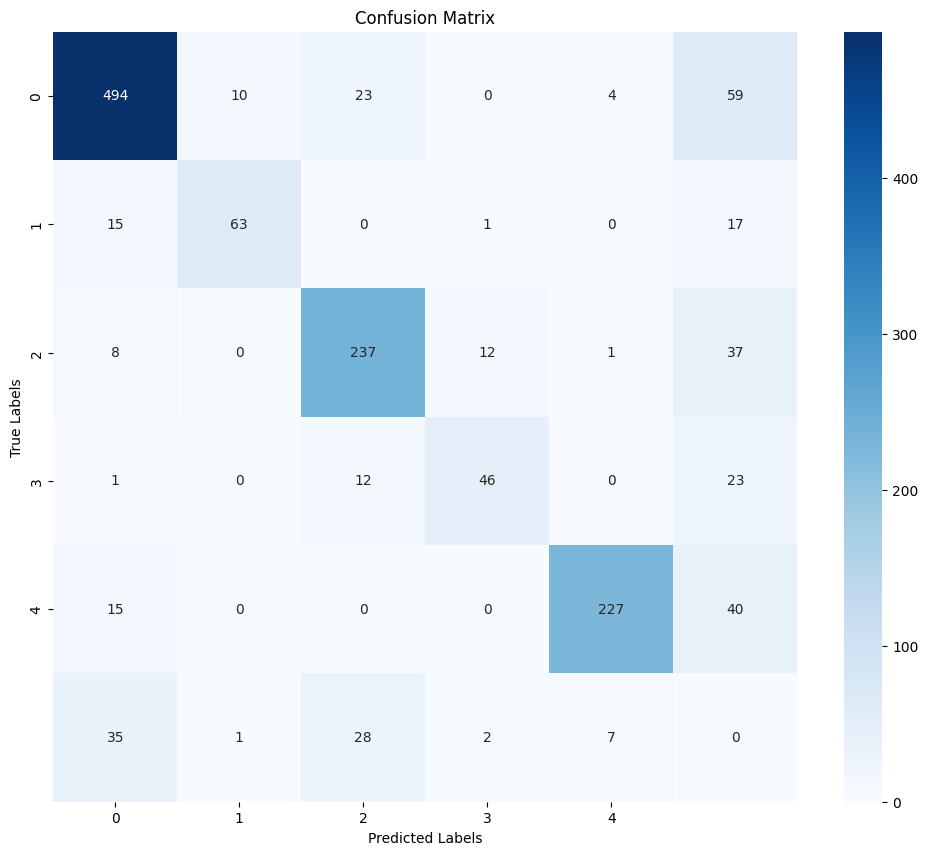

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract confusion matrix
confusion_matrix = metrics.confusion_matrix.matrix
class_names = metrics.names

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   61.5677         1.46718         2.20894         1.89286   
1      2  111.6180         1.61403         2.25216         2.00138   
2      3  160.5370         1.59128         2.22687         1.98008   
3      4  209.6320         1.53016         2.09906         1.92335   
4      5  258.2180         1.47058         1.99580         1.87160   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.21224            0.27971           0.12461   
1               0.13701            0.21560           0.08351   
2               0.33675            0.44849           0.29342   
3               0.51675            0.48419           0.47048   
4               0.57594            0.50148           0.48784   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.05301       2.80506       3.19668       3.22352  0.000369   
1              0.03724       2.10473  

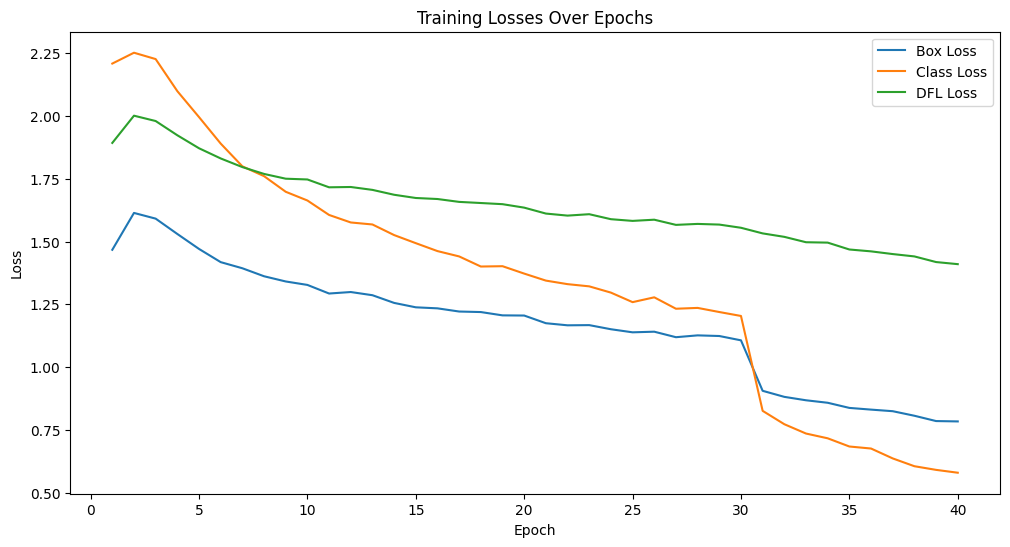

In [8]:
#Detailed Training Metrics

import pandas as pd
results_path = 'runs/detect/train/results.csv'
df_results = pd.read_csv(results_path)

print(df_results.head())

plt.figure(figsize=(12, 6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Box Loss')
plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Class Loss')
plt.plot(df_results['epoch'], df_results['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.show()
#Accurately fetches and visualizes logged training metrics.

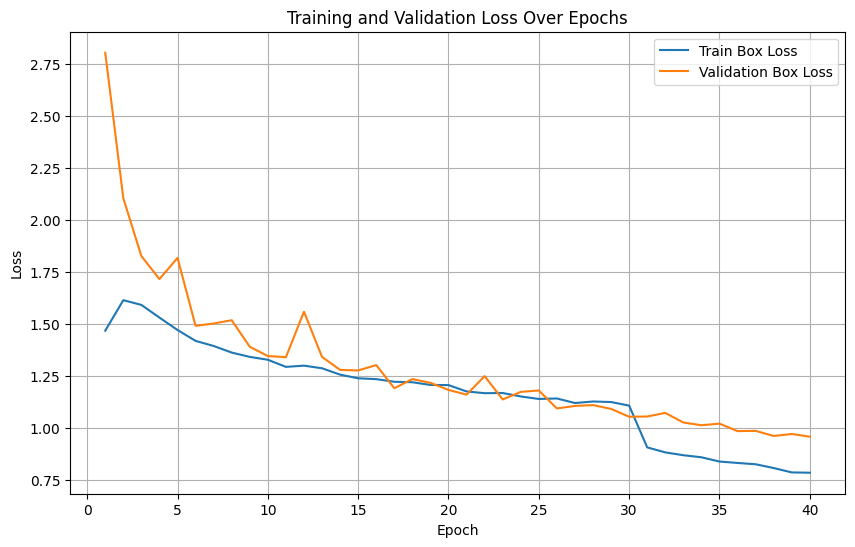

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

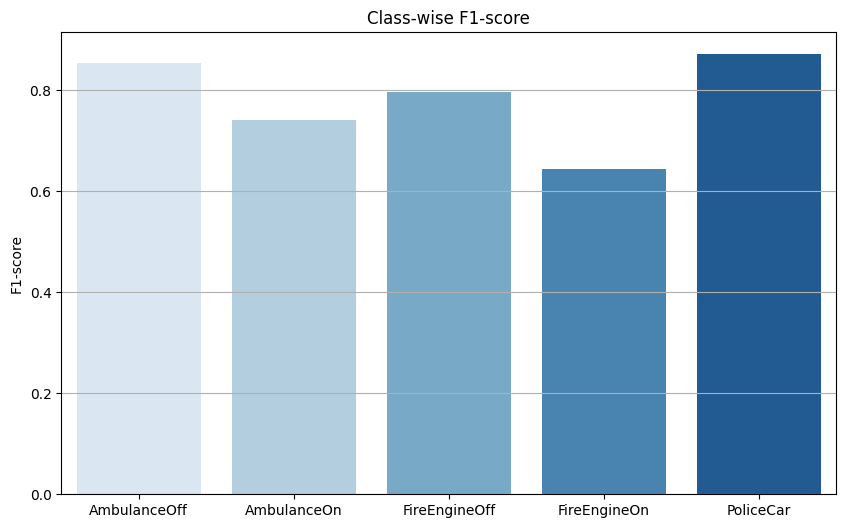

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion matrix from YOLO metrics
cm = metrics.confusion_matrix.matrix

# Manually define your class names (must match your confusion matrix exactly!)
class_names = ['AmbulanceOff', 'AmbulanceOn', 'FireEngineOff', 'FireEngineOn', 'PoliceCar']

# Expand confusion matrix correctly into y_true and y_pred
y_true = []
y_pred = []

for true_label, row in enumerate(cm):
    for pred_label, count in enumerate(row):
        y_true.extend([true_label] * int(count))
        y_pred.extend([pred_label] * int(count))

# Ensure labels match exactly
labels = list(range(len(class_names)))

# Generate the classification report
report = classification_report(y_true, y_pred, labels=labels, target_names=class_names, output_dict=True)

# Extract F1-scores from report
f1_scores = [report[cls]['f1-score'] for cls in class_names]

# Plot F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=f1_scores, palette="Blues")
plt.ylabel('F1-score')
plt.title('Class-wise F1-score')
plt.grid(axis='y')
plt.show()


In [11]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

img_path = '/content/emergency_dataset-4/train/images'

model.predict(source=img_path, save=True)

results = model(img_path)

Streaming output truncated to the last 5000 lines.
image 1988/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.4de7cd24f11f559b5b232aaf2666a777.jpg: 640x640 2 PoliceCars, 18.4ms
image 1989/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.61fad1183e40d06503f6a04a8f9e1435.jpg: 640x640 2 PoliceCars, 18.9ms
image 1990/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.820094567cc7158c73a2de5d290b47c0.jpg: 640x640 (no detections), 17.7ms
image 1991/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.a3eace24d55681cdcf41c158a3841135.jpg: 640x640 (no detections), 17.7ms
image 1992/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.96f3d19e5c215836be055150dd85f6b2.jpg: 640x640 3 AmbulanceOffs, 18.1ms
image 1993/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.c245bc155ccd7a5d6444b2f0fe9489c2.jpg: 640x640 3 AmbulanceOffs, 18.4ms
image 1994/3486 /content/emergency_dataset-4/train/images/PZYKE4UOB

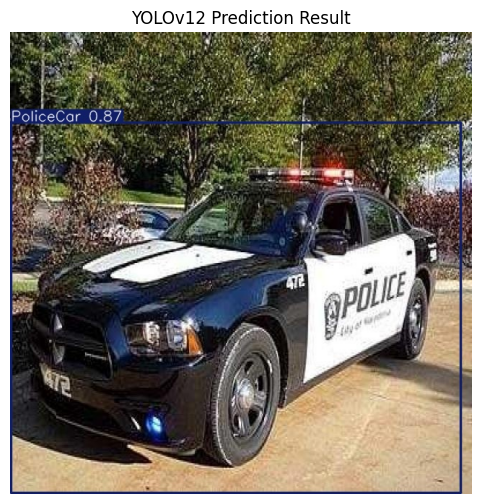

In [25]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import glob

# Define the predicted images folder
predicted_images_path = "/content/runs/detect/predict/"

# Get predicted image from the folder
predicted_images = glob.glob(predicted_images_path + "*.jpg")

if predicted_images:
    image_path = predicted_images[300]

    try:
        img = PILImage.open(image_path)

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title("YOLOv12 Prediction Result")
        plt.show()

    except Exception as e:
        print(f"Error opening {image_path}: {e}")
else:
    print("No predicted images found in the folder.")

In [26]:
#Final Summary
print("Summary of YOLOv12 Experiment 3")
print("Model Used: YOLOv12m (Medium)")
print(f"Final mAP@0.5: {metrics.box.map50:.4f}")
print(f"Final mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Summary of YOLOv12 Experiment 3
Model Used: YOLOv12m (Medium)
Final mAP@0.5: 0.9185
Final mAP@0.5:0.95: 0.6967
Precision     : 0.9030
Recall        : 0.8768
